In [1]:
import pandas as pd
import numpy as np

In [2]:
#MARINA FRIDMAN'S CODE
# load data (prepared by load_climate_clusts)
df = pd.read_csv('../data/jan2021_clust.csv', index_col=0)

# convert published date to datetime
date_format = '%Y-%m-%dT%H:%M:%S'
df['pub_date_dt'] = pd.to_datetime(df.pub_date, format=date_format)

# find NTB articles
df['is_ntb'] = df.authors.str.contains('NTB')
df['is_ntb'] = df.is_ntb.fillna(False)

# fix indices
df['new_idx'] = np.where(df.id.isna(), df.index, df.id)
df.drop('id',axis=1, inplace=True)
df.set_index('new_idx', inplace=True)
df.index.rename('id', inplace=True)

# drop duplicates
df = df[(~df.index.duplicated())]

# fill in nans
df.description.fillna('',inplace=True)
df.content.fillna('',inplace=True)

AttributeError: 'DataFrame' object has no attribute 'id'

In [3]:
df.head()

,url,og_url,domain,title,description,content,entities,authors,paywall,fb_total,...,cat_id,cat_score,outbound_link_ids,inbound_link_ids,pub_day,pub_hour,title_clean,cluster_id,pub_date_dt,is_ntb
id,,,,,,,,,,,,,,,,,,,,,
openZOnz7e7A,https://www.britiskfotball.com/liverpool/liver...,NaN,www.britiskfotball.com,Liverpool vant over Manchester United i kampen...,Liverpool har fullført signeringen av den 16 å...,2. januar 2021 - 00:56 Liverpool har fullført ...,"['Liverpool', 'Manchester United', 'Bajcetic',...",NaN,NaN,32,...,0.0,0.936997,"['8mepg2rzVdMy', 'MYer09yYpbOB']",NaN,2021-01-01,23,liverpool vant over manchest united i kamp om ...,001_3,2021-01-01 23:56:00,False
jneg5XYmkbwZ,http://www.nyereiselivsavisen.no/dzt-sjef-petr...,NaN,www.nyereiselivsavisen.no,DZT-sjef Petra Hedorfer: Innhentingen vil vare...,Reiselivsbransjen må belage seg på en lengre g...,Reiselivsbransjen må belage seg på en lengre g...,"['Tyskland', 'Petra Hedorfer', 'International'...",['Harald Bråthen'],NaN,0,...,157.0,0.392113,"['8mepgVwyVdMy', 'JxboYJRxYegw', '3YaO79l4Raxq...",NaN,2021-01-01,23,dzt sjef petr hedorf innhenting vil var til ti...,001_1629,2021-01-01 23:52:00,False
GRb48LEkVbBL,https://www.avisenagder.no/trafo-og-ledning-ti...,https://www.avisenagder.no/5-99-989302,www.avisenagder.no,(+) Trafo og ledning til 76 mill: Tonstad data...,Bare trafostasjon og jordkabel er kostnadsbere...,Avisen Agder - Trafo og ledning til 76 mill: T...,NaN,['Svein Løvland'],1.0,0,...,NaN,NaN,NaN,NaN,2021-01-01,23,trafo og ledning til mill tonstad datapark søk...,001_922,2021-01-01 23:51:00,False
Jrb2RWz7zbWL,https://www.nettavisen.no/artikkel/3424068784,https://www.nettavisen.no/12-95-3424068784,www.nettavisen.no,California startet året med ny dødsfallstopp,Amerikanere sulteforet på et år med mer positi...,Amerikanere sulteforet på et år med mer positi...,"['California', 'Christina Ghaly', 'NTB', 'Medi...","['NTB', 'NTB Tips meg']",NaN,0,...,106.0,0.751486,NaN,NaN,2021-01-01,23,californi start året med ny dødsfallstopp,001_433,2021-01-01 23:48:00,True
WPe98gR2DdLy,https://www.nrk.no/nyheter/lager-2-mill.-vaksi...,NaN,www.nrk.no,Lager 2 mill. vaksinedoser i uka,Den britiske vaksineprodusenten Astra Zeneca r...,Lager 2 mill. vaksinedoser i uka Den britiske ...,"['Zeneca', 'EU', 'Norge']",['NRK'],NaN,0,...,NaN,NaN,NaN,NaN,2021-01-01,23,lag mill vaksinedos i uka,001_360,2021-01-01 23:48:00,False


In [29]:
df.shape

(213248, 37)

In [101]:
# create a sample dataframe with date column
data = df
df1 = pd.DataFrame(data)

# convert the date column to datetime type
df1['pub_day'] = pd.to_datetime(df1['pub_day'])

# group the data by date and count the occurrences
counts1 = df1.groupby('pub_day').size().reset_index(name='counts')

counts1.head(10)

,pub_day,counts
0,2021-01-01,4818
1,2021-01-02,4441
2,2021-01-03,5025
3,2021-01-04,7173
4,2021-01-05,7390
5,2021-01-06,9027
6,2021-01-07,7588
7,2021-01-08,7669
8,2021-01-09,5245
9,2021-01-10,5209


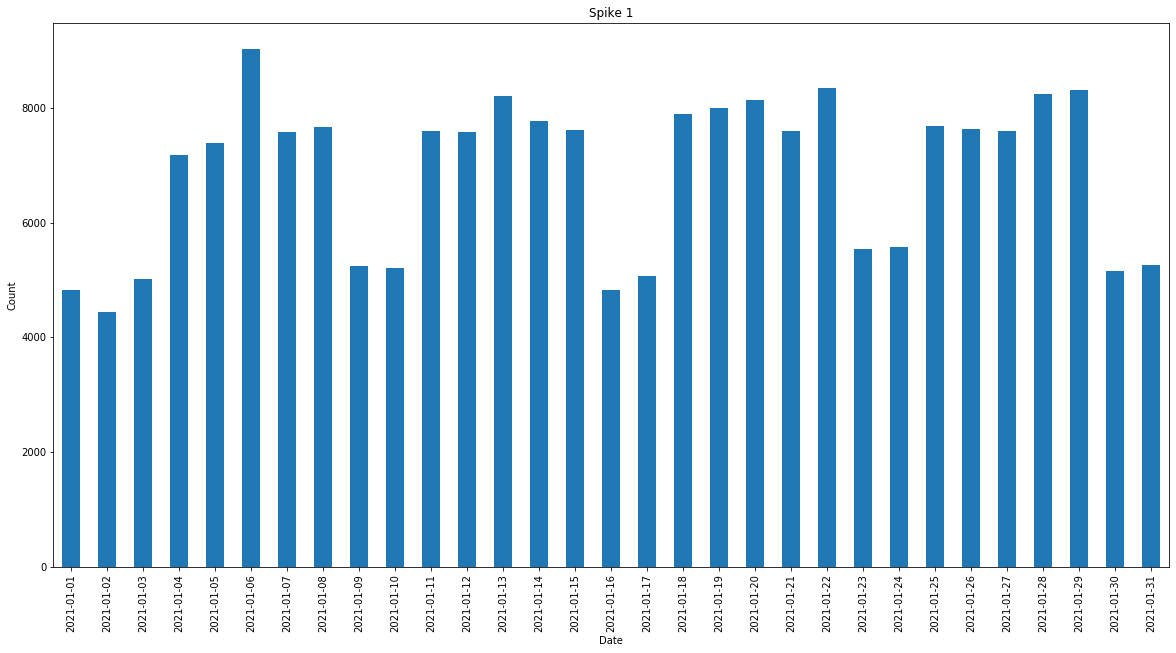

In [102]:
import matplotlib.pyplot as plt

from datetime import date

#Spike 1

start_date = '2021-01-01'
end_date = '2021-01-31'

# slice the data between the start and end dates
counts1 = counts1[(counts1['pub_day'] >= start_date) & (counts1['pub_day'] <= end_date)]

#counts.to_csv('../master/data/spike1.csv')

# plot the date count data using pandas plot method
counts1.plot(x='pub_day', y='counts', kind='bar', figsize=(20, 10), legend=False)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Spike 1')

# format the x-axis labels to display only the date
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(counts1['pub_day'].dt.strftime("%Y-%m-%d")))

#plt.savefig('../figures/non_climate_spike1.png')
plt.show()

In [8]:
spike1 = df1[df1.pub_day == '2021-01-08']
spike1.sample(10)

,url,og_url,domain,title,description,content,entities,authors,paywall,fb_total,...,cat_id,cat_score,outbound_link_ids,inbound_link_ids,pub_day,pub_hour,title_clean,cluster_id,pub_date_dt,is_ntb
id,,,,,,,,,,,,,,,,,,,,,
l9avgjKr0bG1,https://www.smp.no/ntb/utenriks/2021/01/08/By-...,NaN,www.smp.no,By i Kina belønner innbyggere for å melde inn ...,Innbyggerne i byen Nangong nord i Kina blir be...,By i Kina belønner innbyggere for å melde inn ...,NaN,['(NTB) NTB-AP'],NaN,0,...,NaN,NaN,NaN,NaN,2021-01-08,4,by i kin belønn innbygger for å meld inn folk ...,008_2046,2021-01-08 04:57:00,True
Mvbmw2QA3eYA,https://www.glomdalen.no/johannes-thingnes-bo/...,https://www.glomdalen.no/5-19-907010,www.glomdalen.no,(+)Thingnes Bø-jubileum i Oberhof: Verdenscups...,Johannes Thingnes Bø (27) gikk ekstremt fort o...,"Johannes Thingnes Bø, Vintersport | Thingnes B...",NaN,['Martin Gramnæs'],1.0,0,...,NaN,NaN,NaN,NaN,2021-01-08,14,thingn bø jubileum i oberhof verdenscupsei numm,008_210,2021-01-08 14:48:00,False
WZdP1Mm3neKg,https://www.vol.no/nyhetsstudio/2021/01/08/Ber...,NaN,www.vol.no,Ber om at det søkes på veimidler,…,09:41 Ber om at det søkes på veimidler Før jul...,"['Høyres', 'Nordland', 'Solberg', 'Høyres fylk...",['Vidar Lorentsen'],NaN,0,...,126.0,0.812678,NaN,NaN,2021-01-08,8,ber om at det søk på veimidl,008_970,2021-01-08 08:41:00,False
N1aMjEZEObWm,https://www.nettavisen.no/plateanmeldelse/musi...,https://www.nettavisen.no/5-95-159257,www.nettavisen.no,Ei helt spesiell reise,Etter å ha fulgt perkusjonisten Jakop Janssønn...,Etter å ha fulgt perkusjonisten Jakop Janssønn...,"['Jakop', 'Tromsø', 'Jørn Øien', 'Marja Morten...","['Tor Hammerø', 'Tor Hammerø Tips meg']",NaN,0,...,66.0,0.714496,['8mepYg8jraMy'],NaN,2021-01-08,17,ei helt spesiell reis,008_3105,2021-01-08 17:28:00,False
pmbk5w6YNezJ,https://www.tromsoby.no/har-57-gjester-i-karan...,https://www.tromsoby.no/5-96-20767,www.tromsoby.no,(+) Har 57 gjester i karantene midt i Tromsø s...,"Til å begynne med var det stille og rolig, men...",TromsøBy - Har 57 gjester i karantene midt i T...,NaN,['Marius Medby'],1.0,4,...,NaN,NaN,NaN,NaN,2021-01-08,17,har gjest i karant midt i tromsø sentrum komm ...,008_1648,2021-01-08 17:29:00,False
YRdGZY5Z7bDz,https://www.britiskpolitikk.no/2021/01/08/hor-...,https://www.britiskpolitikk.no/2021/01/08/hor-...,www.britiskpolitikk.no,Oversikt podkaster - Britisk politikk,Her kan du høre tidligere episoder av Pod Brit...,Britisk politikk Et uavhengig nettsted om brit...,"['Britisk', 'britisk']",NaN,NaN,0,...,NaN,NaN,NaN,NaN,2021-01-08,9,oversikt podkast britisk politikk,008_967,2021-01-08 09:05:00,False
M7e58lWJAd2v,https://www.an.no/sportspill/tipping/sa-mye-be...,https://www.an.no/12-95-3424072110,www.an.no,Så mye bedre er Dortmund med Haaland på banen,Dortmund har i snitt tatt to poeng per kamp me...,Dortmund har i snitt tatt to poeng per kamp me...,"['Dortmund', 'Bundesliga', 'Haaland', 'Leipzig...",['Tommy Duesund'],NaN,0,...,73.0,0.926440,"['K9b68oLGNeEv', 'k8mepPqxpeMy']",NaN,2021-01-08,23,så mye bedr er dortmund med haaland på ban,008_22,2021-01-08 23:59:00,False
lNbWnwPEnayg,http://www.kontrast1.no/det-ma-vaere-forferdel...,NaN,www.kontrast1.no,Det må være forferdelig å være velstående når ...,Bemerkelsesverdig er at de som er fremst på ve...,Bemerkelsesverdig er at de som er fremst på ve...,"['Bloomberg', 'amerikanske', 'Oslo Børs', 'Pet...",['Gudbrand Gunnar“Alkoholentusiast. Analytiker...,NaN,0,...,82.0,0.353520,NaN,NaN,2021-01-08,18,det må vær forferd å vær velstå når en pandemi...,008_129,2021-01-08 18:25:00,False
QBeX67D3mbyK,https://www.avisenagder.no/snokanonene-har-gat...,https://www.avisenagder.no/5-99-991515,www.avisenagder.no,(+) Snøkanonene har gått for fullt: – Blir flo...,Skianleggene i Sirdal forbereder seg på en flo...,Avisen Agder - Snøkanonene har gått for fullt:...,NaN,['Anette Larsen Aass'],1.0,0,...,NaN,NaN,NaN,NaN,2021-01-08,10,snøkanon har gått for fullt blir flott forhold...,008_1252,2021-01-08 10:47:00,False


In [108]:
# load data (prepared by load_climate_clusts)
df = pd.read_csv('../data/apr2021_clust.csv', index_col=0)

# convert published date to datetime
date_format = '%Y-%m-%dT%H:%M:%S'
df['pub_date_dt'] = pd.to_datetime(df.pub_date, format=date_format)

# find NTB articles
df['is_ntb'] = df.authors.str.contains('NTB')
df['is_ntb'] = df.is_ntb.fillna(False)

# fix indices
df['new_idx'] = np.where(df.id.isna(), df.index, df.id)
df.drop('id',axis=1, inplace=True)
df.set_index('new_idx', inplace=True)
df.index.rename('id', inplace=True)

# drop duplicates
df = df[(~df.index.duplicated())]

# fill in nans
df.description.fillna('',inplace=True)
df.content.fillna('',inplace=True)

AttributeError: 'DataFrame' object has no attribute 'id'

In [10]:
df.shape

(148721, 37)

In [109]:
# create a sample dataframe with date column
data = df
df2 = pd.DataFrame(data)

# convert the date column to datetime type
df2['pub_day'] = pd.to_datetime(df2['pub_day'])

# group the data by date and count the occurrences
counts2 = df2.groupby('pub_day').size().reset_index(name='counts')

counts2.tail(10)

,pub_day,counts
20,2021-04-21,7022
21,2021-04-22,7674
22,2021-04-23,5297
23,2021-04-24,3950
24,2021-04-25,4666
25,2021-04-26,6931
26,2021-04-27,6860
27,2021-04-28,6968
28,2021-04-29,7447
29,2021-04-30,7165


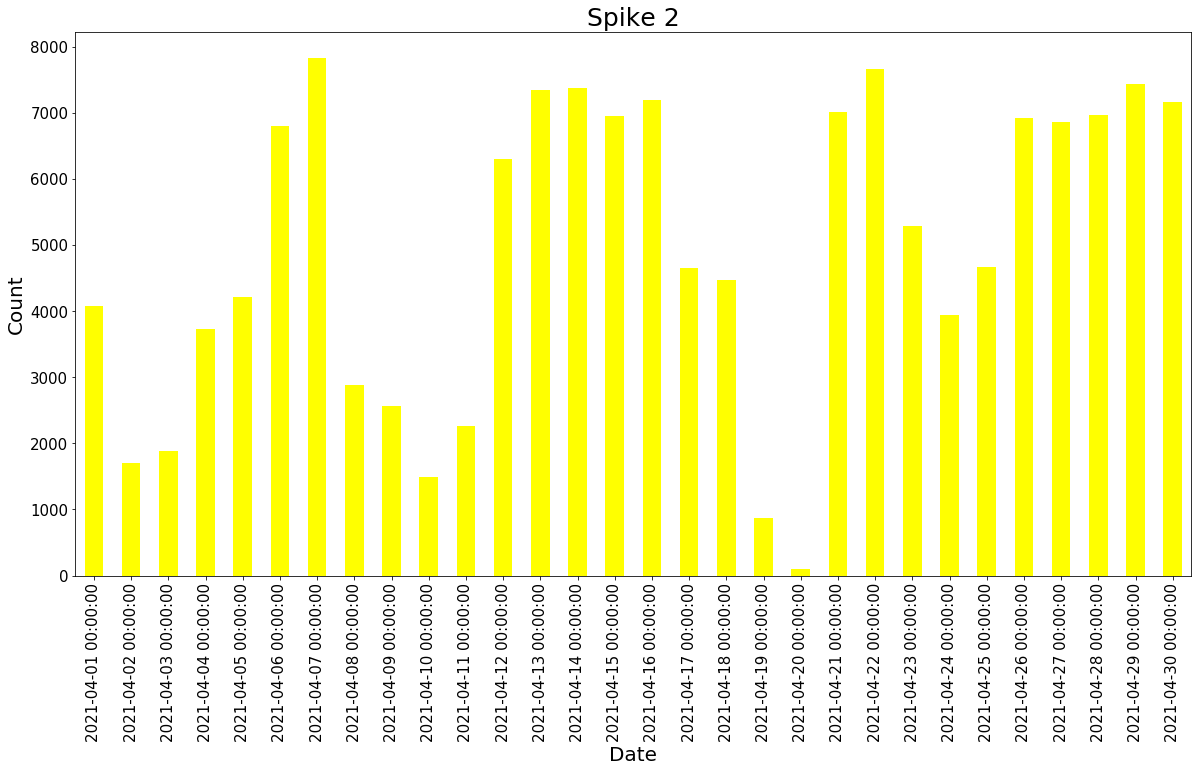

In [110]:
#Spike 2

start_date = '2021-04-01'
end_date = '2021-04-30'

# slice the data between the start and end dates
counts2 = counts2[(counts2['pub_day'] >= start_date) & (counts2['pub_day'] <= end_date)]

# plot the date count data using pandas plot method
counts2.plot(x='pub_day', y='counts', kind='bar', figsize=(20, 10), legend=False, color='yellow')

plt.xlabel('Date', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Spike 2', fontsize=25)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.savefig('../figures/non_climate_spike2.png', bbox_inches='tight')
plt.show()

In [113]:
# load data (prepared by load_climate_clusts)
df = pd.read_csv('../data/aug2021_clust.csv', index_col=0)

# convert published date to datetime
date_format = '%Y-%m-%dT%H:%M:%S'
df['pub_date_dt'] = pd.to_datetime(df.pub_date, format=date_format)

# find NTB articles
df['is_ntb'] = df.authors.str.contains('NTB')
df['is_ntb'] = df.is_ntb.fillna(False)

# fix indices
df['new_idx'] = np.where(df.id.isna(), df.index, df.id)
df.drop('id',axis=1, inplace=True)
df.set_index('new_idx', inplace=True)
df.index.rename('id', inplace=True)

# drop duplicates
df = df[(~df.index.duplicated())]

# fill in nans
df.description.fillna('',inplace=True)
df.content.fillna('',inplace=True)

AttributeError: 'DataFrame' object has no attribute 'id'

In [14]:
df.shape

(169819, 37)

In [114]:
# create a sample dataframe with date column
data = df
df3 = pd.DataFrame(data)

# convert the date column to datetime type
df3['pub_day'] = pd.to_datetime(df3['pub_day'])

# group the data by date and count the occurrences
counts3 = df3.groupby('pub_day').size().reset_index(name='counts')

counts3.head(10)

,pub_day,counts
0,2021-08-01,4064
1,2021-08-02,5753
2,2021-08-03,5608
3,2021-08-04,5814
4,2021-08-05,6029
5,2021-08-06,5852
6,2021-08-07,4082
7,2021-08-08,3961
8,2021-08-09,5888
9,2021-08-10,6110


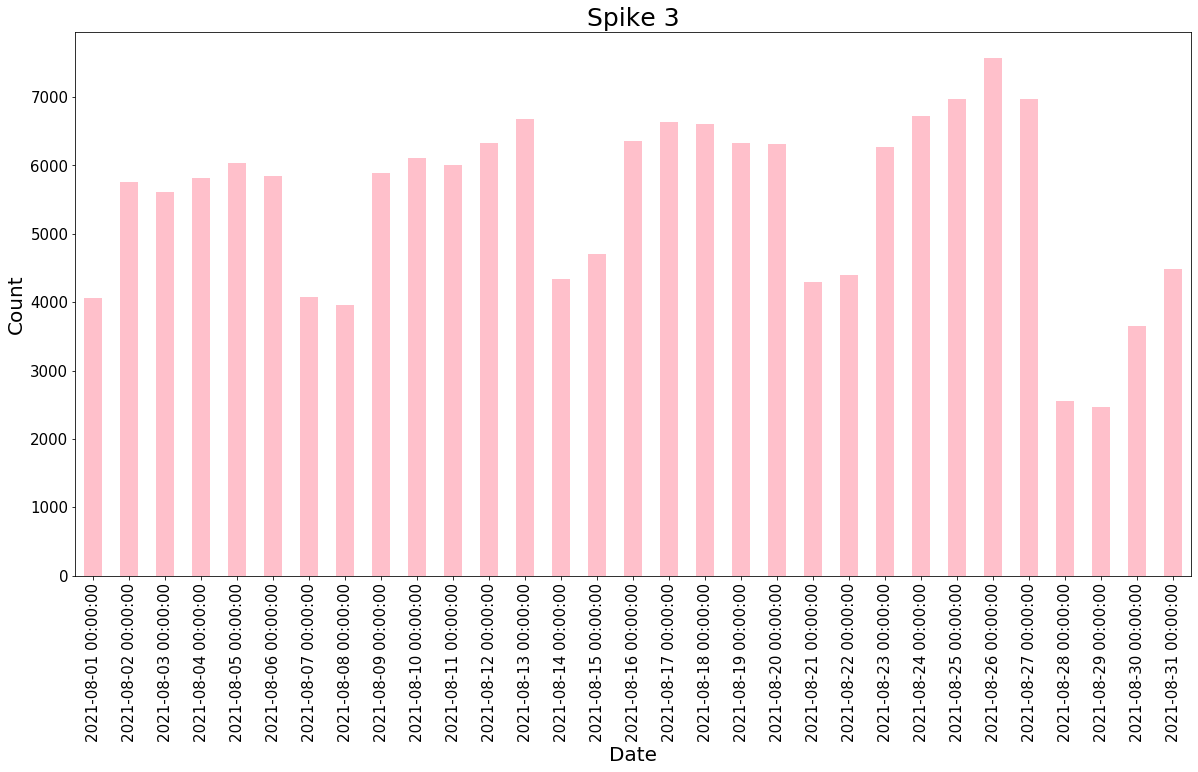

In [115]:
#Spike 3

start_date = '2021-08-01'
end_date = '2021-08-31'

# slice the data between the start and end dates
counts3 = counts3[(counts3['pub_day'] >= start_date) & (counts3['pub_day'] <= end_date)]

# plot the date count data using pandas plot method
counts3.plot(x='pub_day', y='counts', kind='bar', figsize=(20, 10), legend=False, color='pink')

plt.xlabel('Date', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Spike 3', fontsize=25)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.savefig('../figures/non_climate_spike3.png', bbox_inches='tight')
plt.show()

In [125]:
import glob

path = '../data/spike4/*.csv'
files = glob.glob(path)

df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

# convert published date to datetime
date_format = '%Y-%m-%dT%H:%M:%S'
df['pub_date_dt'] = pd.to_datetime(df.pub_date, format=date_format)

# find NTB articles
df['is_ntb'] = df.authors.str.contains('NTB')
df['is_ntb'] = df.is_ntb.fillna(False)

# fix indices
df['new_idx'] = np.where(df.id.isna(), df.index, df.id)
df.drop('id',axis=1, inplace=True)
df.set_index('new_idx', inplace=True)
df.index.rename('id', inplace=True)

# drop duplicates
df = df[(~df.index.duplicated())]

# fill in nans
df.description.fillna('',inplace=True)
df.content.fillna('',inplace=True)

In [127]:
df.shape

(347403, 37)

In [128]:
# create a sample dataframe with date column
data = df
df4 = pd.DataFrame(data)

# convert the date column to datetime type
df4['pub_day'] = pd.to_datetime(df4['pub_day'])

# group the data by date and count the occurrences
counts4 = df4.groupby('pub_day').size().reset_index(name='counts')

counts4.tail(30)

,pub_day,counts
31,2021-11-01,6805
32,2021-11-02,911
33,2021-11-03,6925
34,2021-11-04,7278
35,2021-11-05,6748
36,2021-11-06,4445
37,2021-11-07,4636
38,2021-11-08,6908
39,2021-11-09,6653
40,2021-11-10,6922


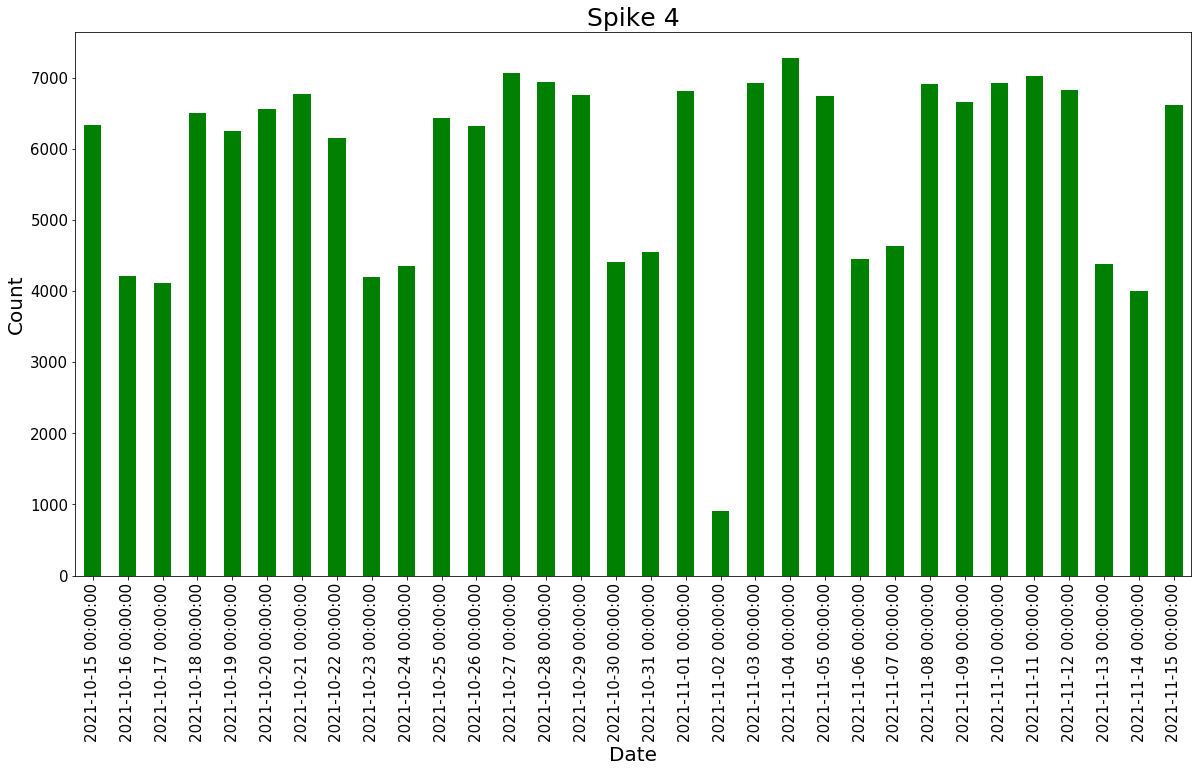

In [129]:
start_date = '2021-10-15'
end_date = '2021-11-15'

# slice the data between the start and end dates
counts4 = counts4[(counts4['pub_day'] >= start_date) & (counts4['pub_day'] <= end_date)]

#counts.to_csv('../master/data/spike4.csv')
# plot the date count data using pandas plot method
counts4.plot(x='pub_day', y='counts', kind='bar', figsize=(20, 10), legend=False, color='green')

plt.xlabel('Date', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Spike 4', fontsize=25)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.savefig('../figures/non_climate_spike4.png', bbox_inches='tight')
plt.show()

In [132]:
path = '../data/spike5/*.csv'
files = glob.glob(path)

df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

# convert published date to datetime
date_format = '%Y-%m-%dT%H:%M:%S'
df['pub_date_dt'] = pd.to_datetime(df.pub_date, format=date_format)

# find NTB articles
df['is_ntb'] = df.authors.str.contains('NTB')
df['is_ntb'] = df.is_ntb.fillna(False)

# fix indices
df['new_idx'] = np.where(df.id.isna(), df.index, df.id)
df.drop('id',axis=1, inplace=True)
df.set_index('new_idx', inplace=True)
df.index.rename('id', inplace=True)

# drop duplicates
df = df[(~df.index.duplicated())]

# fill in nans
df.description.fillna('',inplace=True)
df.content.fillna('',inplace=True)

In [133]:
df.shape

(298860, 37)

In [134]:
# create a sample dataframe with date column
data = df
df5 = pd.DataFrame(data)

# convert the date column to datetime type
df5['pub_day'] = pd.to_datetime(df5['pub_day'])

# group the data by date and count the occurrences
counts5 = df5.groupby('pub_day').size().reset_index(name='counts')

counts5.tail(30)

,pub_day,counts
23,2022-03-24,6574
24,2022-03-25,6413
25,2022-03-26,4108
26,2022-03-27,4347
27,2022-03-28,6422
28,2022-03-29,6473
29,2022-03-30,6751
30,2022-03-31,7316
31,2022-04-01,6775
32,2022-04-02,4388


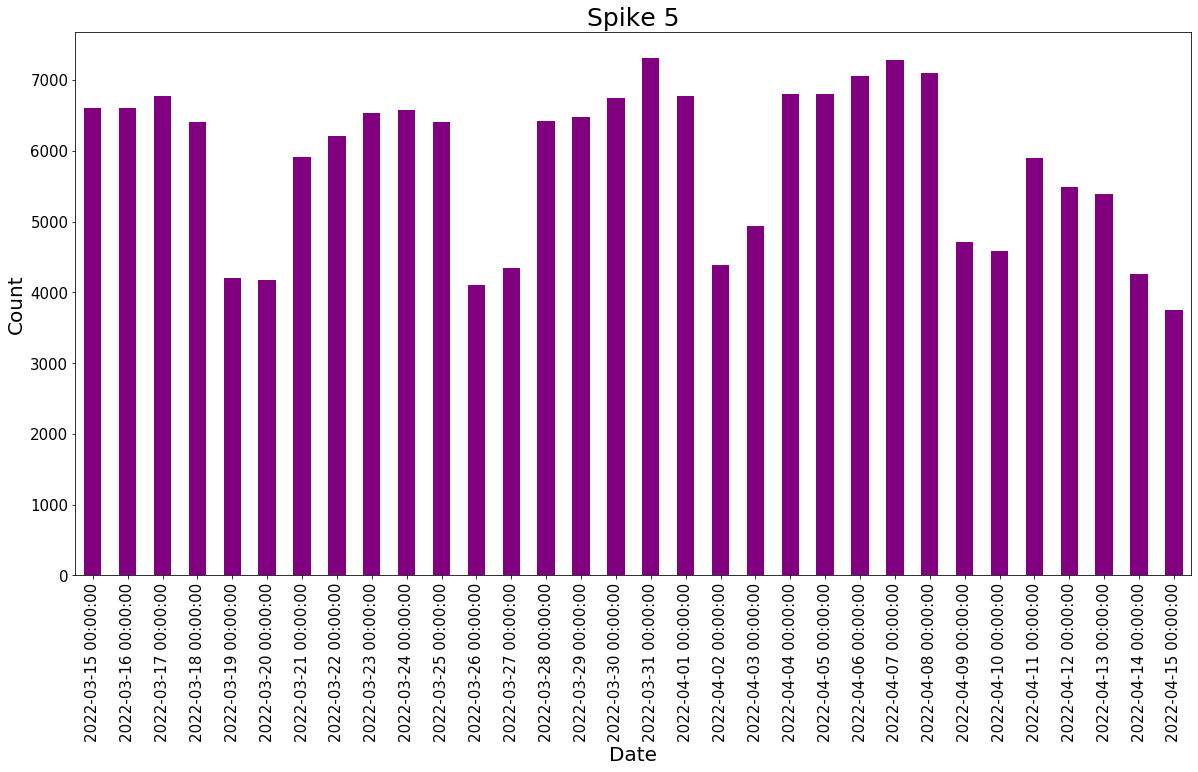

In [135]:
start_date = '2022-03-15'
end_date = '2022-04-15'

# slice the data between the start and end dates
counts5 = counts5[(counts5['pub_day'] >= start_date) & (counts5['pub_day'] <= end_date)]

# plot the date count data using pandas plot method
counts5.plot(x='pub_day', y='counts', kind='bar', figsize=(20, 10), legend=False, color='purple')

plt.xlabel('Date', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Spike 5', fontsize=25)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.savefig('../figures/non_climate_spike5.png', bbox_inches='tight')
plt.show()

In [103]:
# load data (prepared by load_climate_clusts)
df_climate = pd.read_csv('../data/klima_articles_5Copy.csv', index_col=0)

# convert published date to datetime
date_format = '%Y-%m-%dT%H:%M:%S'
df_climate['pub_date_dt'] = pd.to_datetime(df_climate.pub_date, format=date_format)

# find NTB articles
df_climate['is_ntb'] = df_climate.authors.str.contains('NTB')
df_climate['is_ntb'] = df_climate.is_ntb.fillna(False)

# fix indices
df_climate['new_idx'] = np.where(df_climate.id.isna(), df_climate.index, df_climate.id)
df_climate.drop('id',axis=1, inplace=True)
df_climate.set_index('new_idx', inplace=True)
df_climate.index.rename('id', inplace=True)

# drop duplicates
df_climate = df_climate[(~df_climate.index.duplicated())]

# fill in nans
df_climate.description.fillna('',inplace=True)
df_climate.content.fillna('',inplace=True)

In [104]:
data = df_climate
df_c = pd.DataFrame(data)

# convert the date column to datetime type
df_c['pub_day'] = pd.to_datetime(df_c['pub_day'])

c_counts1 = df_c.groupby('pub_day').size().reset_index(name='counts')

start_date = '2021-01-01'
end_date = '2021-01-31'

# slice the data between the start and end dates
c_counts1 = c_counts1[(c_counts1['pub_day'] >= start_date) & (c_counts1['pub_day'] <= end_date)]

In [105]:
c_counts1.head()
#counts1.head()


,pub_day,counts
0,2021-01-01,20
1,2021-01-02,18
2,2021-01-03,38
3,2021-01-04,65
4,2021-01-05,63


In [106]:
#Spike 1 - percent of total that is climate articels each day

# New name and columns for the total counts 
total_counts = counts1
total_counts.columns = ['pub_day', 'total_counts']

# New name and columns for climate counts
climate_counts = c_counts1
climate_counts.columns = ['pub_day', 'climate_counts']

# Set the date column as the index
total_counts.set_index('pub_day', inplace=True)
climate_counts.set_index('pub_day', inplace=True)

# Calculate the percentage of climate articles
percentage_df = (climate_counts['climate_counts'] / total_counts['total_counts']) * 100
percentage_df = percentage_df.rename('climate_percentage')

# Round the percentage to two decimal places
percentage_df = percentage_df.round(2)

# Create the final table
final_table = pd.concat([total_counts, percentage_df], axis=1)

# Display the table
print(final_table)


            total_counts  climate_percentage
pub_day                                     
2021-01-01          4818                0.42
2021-01-02          4441                0.41
2021-01-03          5025                0.76
2021-01-04          7173                0.91
2021-01-05          7390                0.85
2021-01-06          9027                0.75
2021-01-07          7588                1.63
2021-01-08          7669                3.61
2021-01-09          5245                1.05
2021-01-10          5209                0.61
2021-01-11          7603                2.20
2021-01-12          7587                2.00
2021-01-13          8217                1.45
2021-01-14          7771                1.09
2021-01-15          7608                1.30
2021-01-16          4819                0.81
2021-01-17          5071                0.45
2021-01-18          7892                0.79
2021-01-19          7994                1.24
2021-01-20          8144                1.36
2021-01-21

In [107]:
c_counts2 = df_c.groupby('pub_day').size().reset_index(name='counts')

start_date = '2021-04-01'
end_date = '2021-04-30'

c_counts2 = c_counts2[(c_counts2['pub_day'] >= start_date) & (c_counts2['pub_day'] <= end_date)]

In [111]:
#Spike 2 - percent of total that is climate articels each day

# New name and columns for the total counts 
total_counts = counts2
total_counts.columns = ['pub_day', 'total_counts']

# New name and columns for climate counts
climate_counts = c_counts2
climate_counts.columns = ['pub_day', 'climate_counts']

# Set the date column as the index
total_counts.set_index('pub_day', inplace=True)
climate_counts.set_index('pub_day', inplace=True)

# Calculate the percentage of climate articles
percentage_df = (climate_counts['climate_counts'] / total_counts['total_counts']) * 100
percentage_df = percentage_df.rename('climate_percentage')

# Round the percentage to two decimal places
percentage_df = percentage_df.round(2)

# Create the final table
final_table = pd.concat([total_counts, percentage_df], axis=1)

# Display the table
print(final_table)

            total_counts  climate_percentage
pub_day                                     
2021-04-01          4087                0.59
2021-04-02          1700                1.41
2021-04-03          1883                0.85
2021-04-04          3733                0.56
2021-04-05          4214                0.59
2021-04-06          6799                0.78
2021-04-07          7837                1.00
2021-04-08          2890                1.76
2021-04-09          2561                1.64
2021-04-10          1485                1.68
2021-04-11          2263                1.02
2021-04-12          6304                1.08
2021-04-13          7350                1.01
2021-04-14          7379                0.73
2021-04-15          6961                1.19
2021-04-16          7204                1.40
2021-04-17          4653                0.64
2021-04-18          4468                0.83
2021-04-19           877                1.82
2021-04-20            93                 NaN
2021-04-21

In [112]:
c_counts3 = df_c.groupby('pub_day').size().reset_index(name='counts')

start_date = '2021-08-01'
end_date = '2021-08-31'

c_counts3 = c_counts3[(c_counts3['pub_day'] >= start_date) & (c_counts3['pub_day'] <= end_date)]

In [116]:
#Spike 3 - percent of total that is climate articels each day

# New name and columns for the total counts 
total_counts = counts3
total_counts.columns = ['pub_day', 'total_counts']

# New name and columns for climate counts
climate_counts = c_counts3
climate_counts.columns = ['pub_day', 'climate_counts']

# Set the date column as the index
total_counts.set_index('pub_day', inplace=True)
climate_counts.set_index('pub_day', inplace=True)

# Calculate the percentage of climate articles
percentage_df = (climate_counts['climate_counts'] / total_counts['total_counts']) * 100
percentage_df = percentage_df.rename('climate_percentage')

# Round the percentage to two decimal places
percentage_df = percentage_df.round(2)

# Create the final table
final_table = pd.concat([total_counts, percentage_df], axis=1)

# Display the table
print(final_table)

            total_counts  climate_percentage
pub_day                                     
2021-08-01          4064                0.84
2021-08-02          5753                0.61
2021-08-03          5608                0.78
2021-08-04          5814                0.67
2021-08-05          6029                1.04
2021-08-06          5852                1.13
2021-08-07          4082                0.88
2021-08-08          3961                1.36
2021-08-09          5888                5.84
2021-08-10          6110                4.29
2021-08-11          6012                3.24
2021-08-12          6327                2.39
2021-08-13          6681                2.42
2021-08-14          4335                1.91
2021-08-15          4704                1.28
2021-08-16          6365                2.97
2021-08-17          6639                2.76
2021-08-18          6600                1.70
2021-08-19          6327                1.66
2021-08-20          6308                2.41
2021-08-21

In [123]:
c_counts4 = df_c.groupby('pub_day').size().reset_index(name='counts')

start_date = '2021-10-15'
end_date = '2021-11-15'

c_counts4 = c_counts4[(c_counts4['pub_day'] >= start_date) & (c_counts4['pub_day'] <= end_date)]

In [130]:
#Spike 4 - percent of total that is climate articels each day

# New name and columns for the total counts 
total_counts = counts4
total_counts.columns = ['pub_day', 'total_counts']

# New name and columns for climate counts
climate_counts = c_counts4
climate_counts.columns = ['pub_day', 'climate_counts']

# Set the date column as the index
total_counts.set_index('pub_day', inplace=True)
climate_counts.set_index('pub_day', inplace=True)

# Calculate the percentage of climate articles
percentage_df = (climate_counts['climate_counts'] / total_counts['total_counts']) * 100
percentage_df = percentage_df.rename('climate_percentage')

# Round the percentage to two decimal places
percentage_df = percentage_df.round(2)

# Create the final table
final_table = pd.concat([total_counts, percentage_df], axis=1)

# Display the table
print(final_table)

            total_counts  climate_percentage
pub_day                                     
2021-10-15          6328                1.39
2021-10-16          4212                0.57
2021-10-17          4117                0.95
2021-10-18          6508                1.35
2021-10-19          6249                1.02
2021-10-20          6552                1.92
2021-10-21          6767                1.42
2021-10-22          6147                1.25
2021-10-23          4197                1.29
2021-10-24          4355                1.29
2021-10-25          6434                1.99
2021-10-26          6320                2.14
2021-10-27          7069                1.64
2021-10-28          6943                3.13
2021-10-29          6757                1.78
2021-10-30          4402                2.16
2021-10-31          4542                2.44
2021-11-01          6805                5.41
2021-11-02           911                3.18
2021-11-03          6925                2.27
2021-11-04

In [131]:
c_counts5 = df_c.groupby('pub_day').size().reset_index(name='counts')

start_date = '2022-03-15'
end_date = '2022-04-15'

c_counts5 = c_counts5[(c_counts5['pub_day'] >= start_date) & (c_counts5['pub_day'] <= end_date)]

In [136]:
#Spike 5 - percent of total that is climate articels each day

# New name and columns for the total counts 
total_counts = counts5
total_counts.columns = ['pub_day', 'total_counts']

# New name and columns for climate counts
climate_counts = c_counts5
climate_counts.columns = ['pub_day', 'climate_counts']

# Set the date column as the index
total_counts.set_index('pub_day', inplace=True)
climate_counts.set_index('pub_day', inplace=True)

# Calculate the percentage of climate articles
percentage_df = (climate_counts['climate_counts'] / total_counts['total_counts']) * 100
percentage_df = percentage_df.rename('climate_percentage')

# Round the percentage to two decimal places
percentage_df = percentage_df.round(2)

# Create the final table
final_table = pd.concat([total_counts, percentage_df], axis=1)

# Display the table
print(final_table)

            total_counts  climate_percentage
pub_day                                     
2022-03-15          6607                1.26
2022-03-16          6610                1.29
2022-03-17          6777                1.06
2022-03-18          6405                0.72
2022-03-19          4207                0.62
2022-03-20          4169                0.50
2022-03-21          5910                1.44
2022-03-22          6209                1.30
2022-03-23          6528                1.18
2022-03-24          6574                0.87
2022-03-25          6413                1.25
2022-03-26          4108                0.63
2022-03-27          4347                0.41
2022-03-28          6422                1.34
2022-03-29          6473                1.30
2022-03-30          6751                1.54
2022-03-31          7316                1.71
2022-04-01          6775                1.28
2022-04-02          4388                0.87
2022-04-03          4944                0.81
2022-04-04